# capstone project-- Walmart

Problem Statement

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Project Objective

by using the data and make prediction models to forecast the sales on weekly 

# Data Description


In [1]:
import numpy as np 
import pandas as pd

In [15]:
df=pd.read_csv("Walmart (1).csv")

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape  #thereis 6435 rows, and 8 columnes.

(6435, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


Shows highst weeklysales is  3818686.

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year



C:\Users\HP\AppData\Local\Temp\ipykernel_9676\1067455974.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


 Date col. is spread into day, Month and year for further analysis.

In [20]:
df  # final dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


In [22]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day                7
Week              52
Month             12
Year               3
dtype: int64

The dataset has the following files:

The data, which covers 2010–02–05 to 2012–11–01. Within this file you will find the following fields:
    Store:        The store number
    Date:         The week
    Weekly_Sales: Sales for the given department in the given store
    IsHoliday:    Whether the week is a special holiday week
    Temperature:  Average temperature in the region (Fahrenheit)
    Fuel_Price:   Cost of fuel in the region
    CPI:          The consumer price index. It measures the monthly changes in prices paid by US consumers

# Data visuals

In [24]:
import matplotlib.pyplot as plt

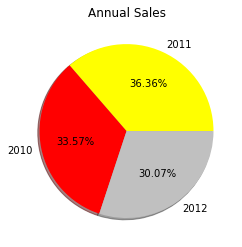

In [30]:
plt.pie(df['Year'].value_counts().values,labels =df['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['yellow','red',"silver"])
plt.title('Annual Sales')
plt.show()

--> 2011 has highest sales 

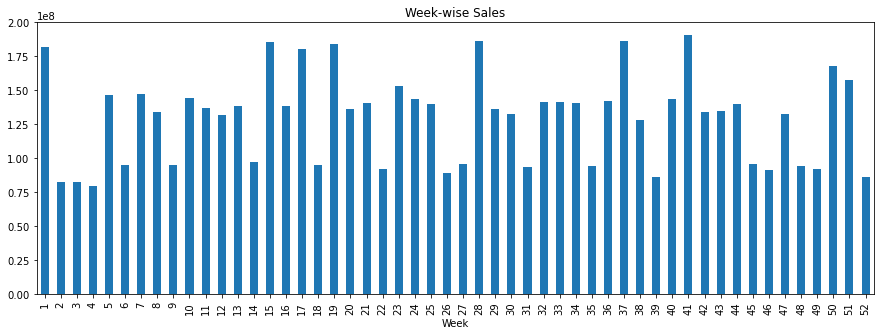

In [42]:
plt.figure(figsize=(15,5))

df.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

--> 41st week has highest sale

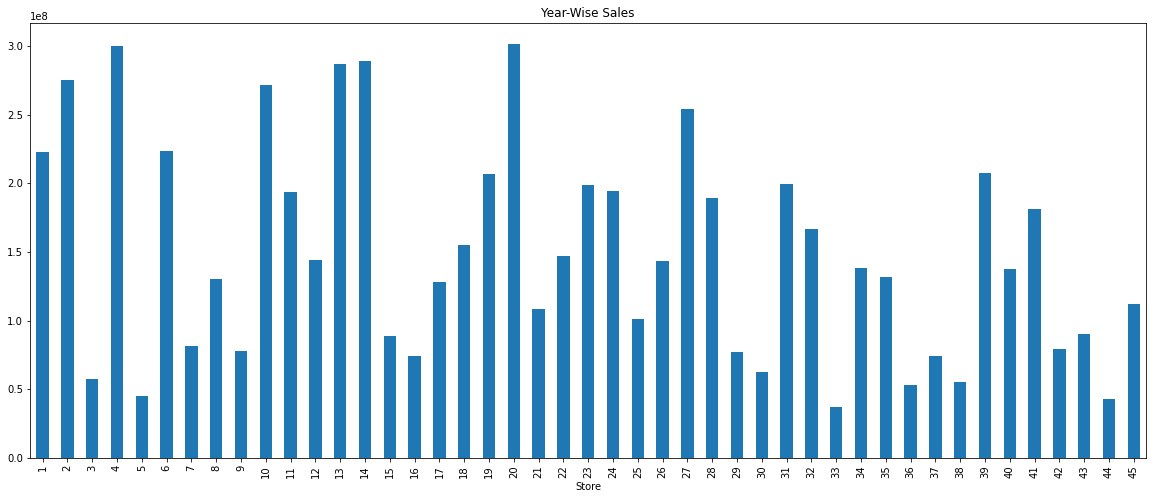

In [40]:
plt.figure(figsize=(20,8))

df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

-->Store number 4 and 20 have highest weekly sales.

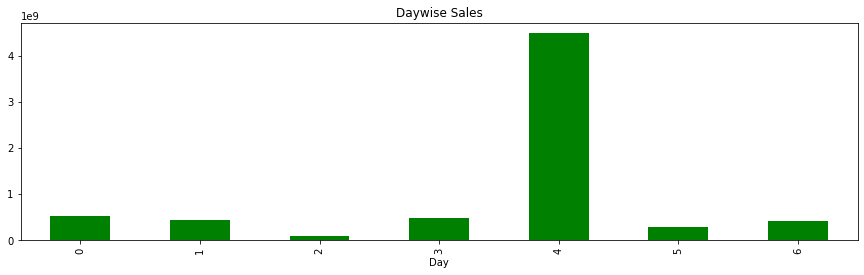

In [41]:
plt.figure(figsize=(15,4))

df.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Daywise Sales')

plt.show()

-->Thursday has maximum sales in a week.

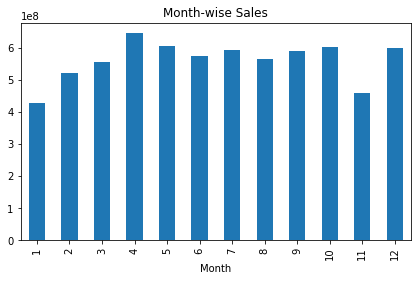

In [43]:
plt.figure(figsize=(7,4))

df.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Month-wise Sales')

plt.show()

--> April has maximum sales in a year


In [47]:
import seaborn as sns

In [52]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


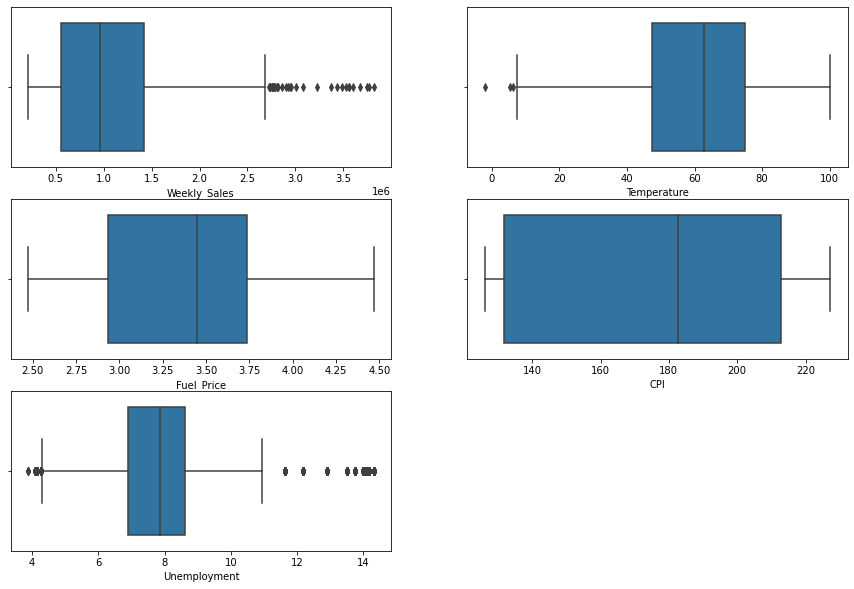

In [51]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

shows outliers in weekly sales , unemployment,and temprature

In [53]:
l = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

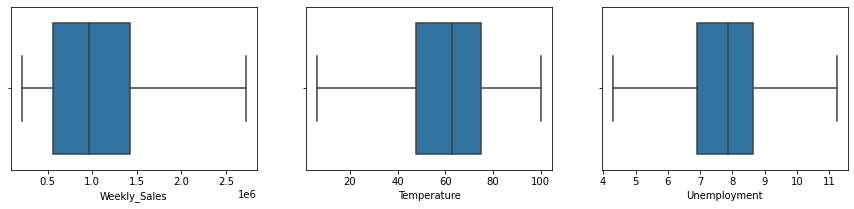

In [54]:
n = 1
cols =["Weekly_Sales","Temperature","Unemployment"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [55]:
dfcopy=df.copy()
dfcopy.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [58]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
dfcopy['Day'] = dfcopy['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
dfcopy['Month']= dfcopy['Month'].map(months)
dfcopy.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,17,May,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,48,December,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,7,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,8,February,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,18,May,2010


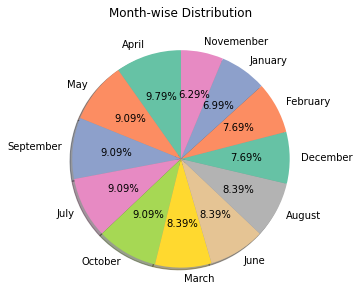

In [65]:
plt.figure(figsize=(15,5))
plt.pie(dfcopy['Month'].value_counts().values, labels =dfcopy['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()

max in april month
min in nov month

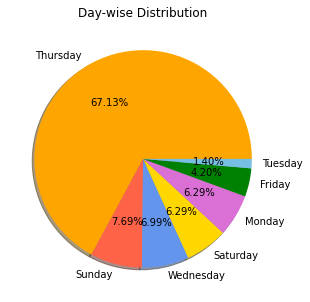

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 2)
plt.pie(dfcopy['Day'].value_counts().values, labels =dfcopy['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=["Orange",'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]) 
plt.title('Day-wise Distribution')
plt.grid()

max in thur in week
min in tues in week

<Figure size 1080x864 with 0 Axes>

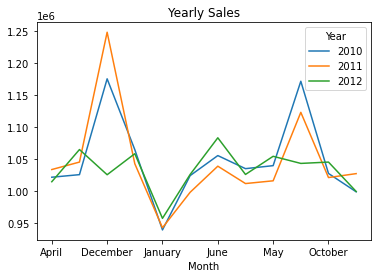

In [72]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(dfcopy, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

max sales is in 2011 and 2010 , in dec.

In [73]:
print('Minimum Sales in the Walmart: ',dfcopy.groupby('Store')['Weekly_Sales'].sum().min())
print('Maximum Sales in the Walmart: ',dfcopy.groupby('Store')['Weekly_Sales'].sum().max())

Minimum Sales in the Walmart:  37160221.96
Maximum Sales in the Walmart:  299066335.2575


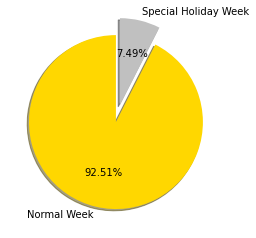

In [74]:
df3 = dfcopy.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels= ['Normal Week','Special Holiday Week'],
autopct='%1.2f%%',startangle=90,explode=[0,0.2],shadow=True,colors=['gold','silver'])
plt.show()

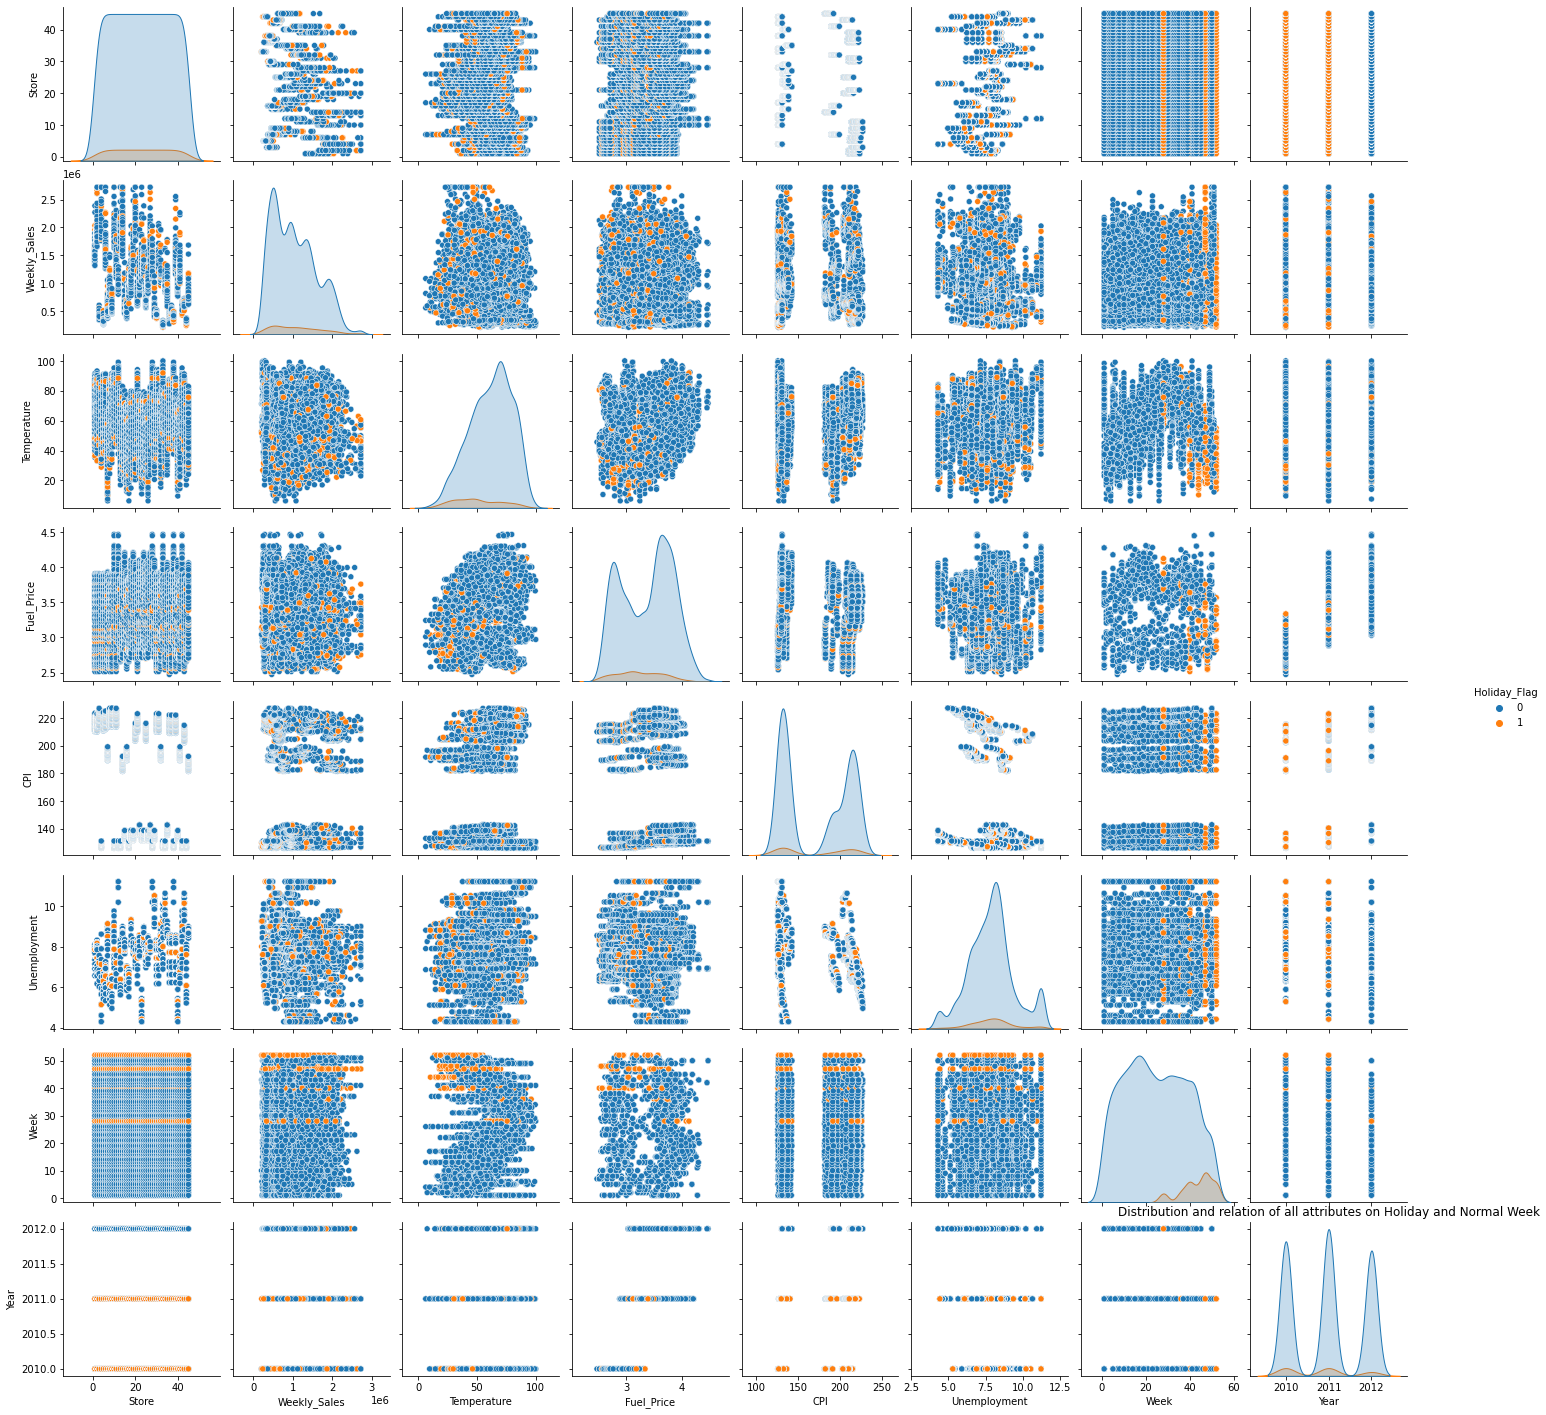

In [75]:
sns.pairplot(dfcopy , hue = "Holiday_Flag" );
plt.title("Distribution and relation of all attributes on Holiday and Normal Week");

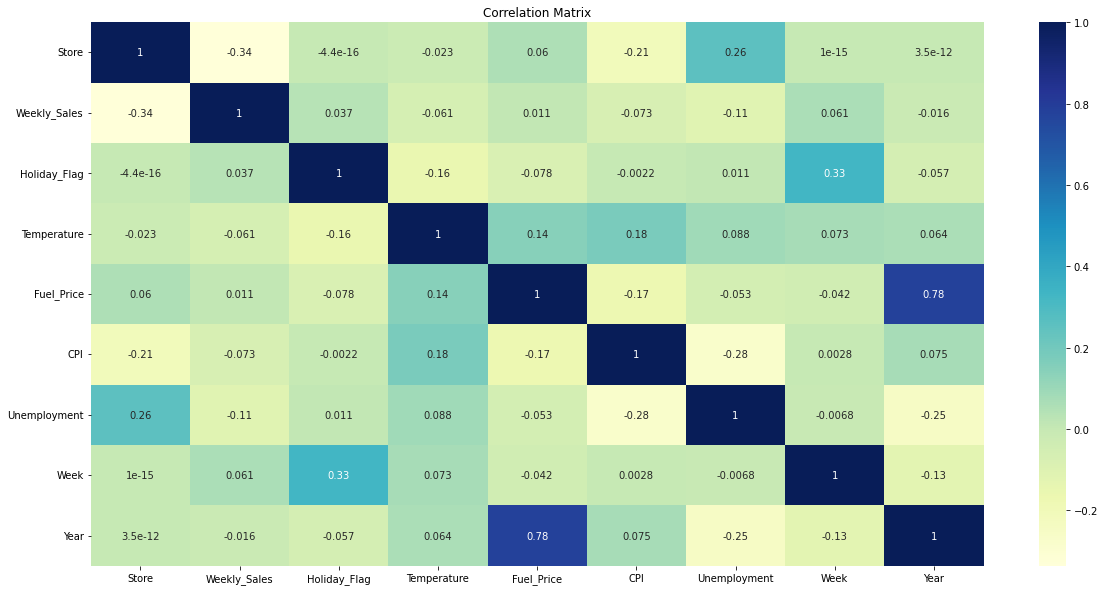

In [76]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcopy.corr(),annot=True,cmap ="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

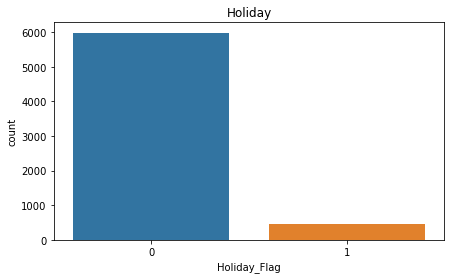

In [77]:
plt.figure(figsize=(7,4))

sns.countplot(x= dfcopy.Holiday_Flag)
plt.title('Holiday')

plt.show()

In [78]:
dfcopy.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

# Model Building

As problem of departmnet ,we have to predict the frame for the sales for the week

In [96]:
x = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']


In [100]:
x.drop('Date',axis=1, inplace=True)

In [97]:
from sklearn.preprocessing import StandardScaler  


In [95]:
x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [112]:
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x,y=None)

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state= 1)

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [155]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [156]:
x = [model(y_test,y_train,x_test,x_train,i)
     for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,
               DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 274893714903.8351
MAE: 439066.05738332187
R2 : 14.35 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 274892876211.85535
MAE: 439064.1572778736
R2 : 14.35 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 274881999676.08307
MAE: 439039.4611674233
R2 : 14.35 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 281266557765.9368
MAE: 447228.31445277977
R2 : 12.36 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+14, tolerance: 1.482e+11
  model = cd_fast.enet_coordinate_descent(


-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 12879549595.682484
MAE: 62750.66079362956
R2 : 95.99 %
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 21390408894.030327
MAE: 78785.06107209445
R2 : 93.34 %
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 216930295443.6128
MAE: 350690.6227554382
R2 : 32.41 %
-----------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
-----------------
MSE: 31815894069.368073
MAE: 132302.82402408702
R2 : 90.09 %


[None, None, None, None, None, None, None, None]

# Random Forest Regressor ,gives 96% accurate Walmart Sales Prediction.

# Conclusions

Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average.

Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are higher than the lowest performing stores.

The best model for predicting future sales is the 'Random Forest Regressor model' which achieves 
MSE: 1287954955.682484
MAE: 62750.66079362956
R2 : 95.99 %

gives 96% accurate Walmart Sales